In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-data/Iris.csv


İlk olarak üzerinde çalışma yapacağımız kütüphaneler yüklenmelidir.Bu veri setinde (numpy,pandas,seaborn ve matplotlib) kütüphaneleri kullanılmıştır.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/kaggle/input/iris-data/Iris.csv')
df.sample(10)



/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
73,74,6.1,2.8,4.7,1.2,Iris-versicolor
126,127,6.2,2.8,4.8,1.8,Iris-virginica
26,27,5.0,3.4,1.6,0.4,Iris-setosa
13,14,4.3,3.0,1.1,0.1,Iris-setosa
94,95,5.6,2.7,4.2,1.3,Iris-versicolor
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
78,79,6.0,2.9,4.5,1.5,Iris-versicolor
101,102,5.8,2.7,5.1,1.9,Iris-virginica
4,5,5.0,3.6,1.4,0.2,Iris-setosa
117,118,7.7,3.8,6.7,2.2,Iris-virginica


Veri setinde kullanmayacağımız ya da gerek duyulmayalan sütunlar df.drop() kullanılarak temizlenmiştir.
İnplace=True ifadesi kullanılarak veri setinin orjinalinde değişiklik yapılmasına izin verilmiştir.
df.info() ile veri setine ait bilgiler görüntülenmektedir.


In [3]:
#2.adım df analizi ve temizlenmesi
df.drop(["Id"], axis=1 , inplace=True)
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Veri görselleştimeleri için seaborn kütüphanesinden faydalanılmıştır.Burada verilerin çiftli çizimler halinde görselleştirilmesi amaçlanmıştır.
Hue parametresi ile oluşturulacak noktaların renkleri belirlenmiştir.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


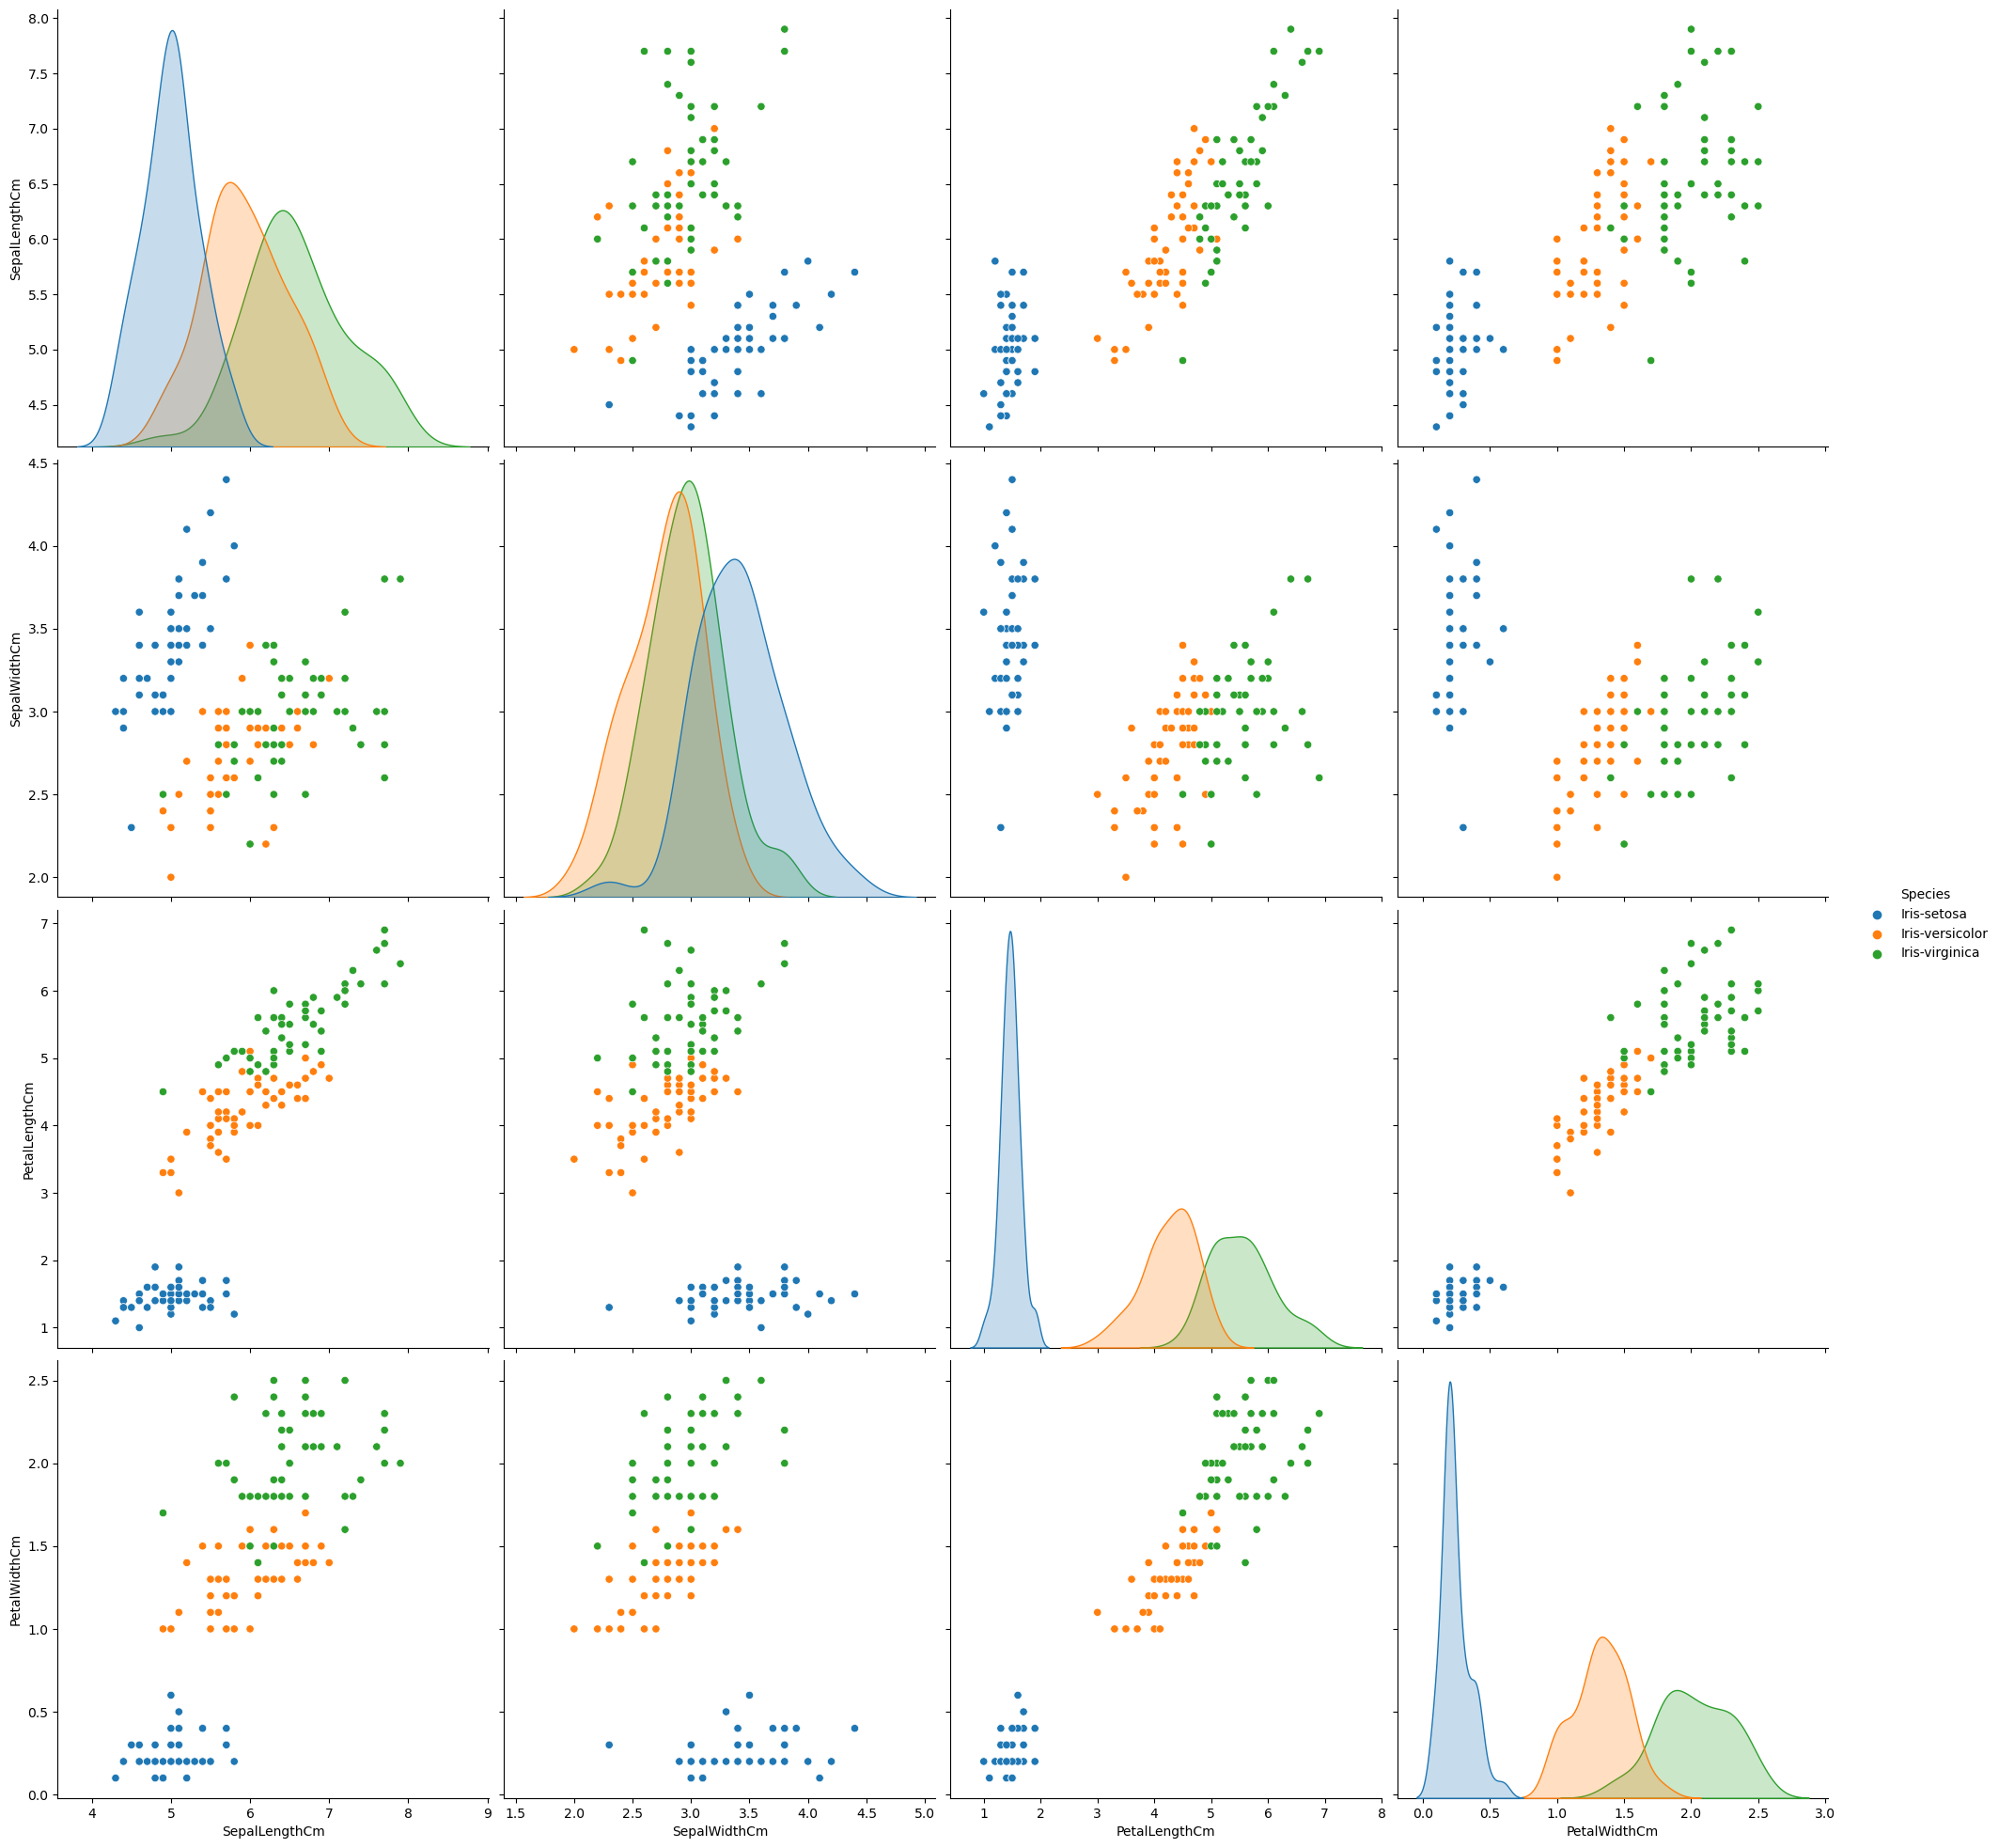

In [4]:
sns.pairplot(df, hue = 'Species', height = 5)
plt.show()

Tüm sütunların kısa bir özetini alabiliriz.

In [5]:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


Bu kısımda veri ön işlemesinin yapılabilmesi için (preprocessing) dahil edilmiştir.Label Encoding işlemi bir veri ön işlemedir ve kategorik verilerin, sayısal hale dönüştürülmesini sağlamaktadır.Fakat Label Encoding işleminde veriler farklı rakamlar ile gösterilebilir mesela(1,2,3,4,5,6....) bu durum bazı karışıklıklara yol açabilir.

One Hot Encoding ile de veri ön işleme yapılmaktadır ama Label Encoding'den farkı 0-1 olarak sayısallaştırmasıdır.


In [6]:
#5.adım label encoder
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

le = preprocessing.LabelEncoder()
df['Species']= le.fit_transform(df['Species'])
df


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Keras ve tensorflow  çoklu sınıfandırma işlemlerinde kullanılmaktadır ve bu kısımda x ve y için etiketleme yapılmıştır.

In [7]:
#6.adım x ve y olarak df bölünmesi, kategorik veri dönüşümü
from tensorflow.keras.utils import to_categorical

x = df.drop(['Species'], axis=1)
y = to_categorical(df.Species)


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Veri setinin eğitimi için train_test_split fonksiyonu kullanılmıştır.
X_train ve x_test modelin eğitilmesi için kullanılacak giriş verilerinden oluşmaktadır.
y_train ve y_test  modelin eğitim sonucunda hedef sınıf değişkenlerini belirtmektedir.
Random_state rastgele veri bölme işlemi için kullanılır.Shuffle verilerin karıştırılıp karıştırılmayacağını ifade etmektedir.


In [8]:
#7.adım veri setinin train/test şeklinde split edilmesi
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,shuffle=False, test_size=0.6)

In [9]:
#8.adım ANN yapısının kurulması için kütüphanelerin import edilmesi
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
model = Sequential()

#keras.utils.set_random_seed(0)

In [10]:
#9.adım giriş, ara katman ve çıkış katmanının oluşturulması
model.add(Dense(units = 8,  activation = 'relu', input_dim = len(x.columns)))

model.add(Dense(units = 8,  activation = 'relu' ))

model.add(Dense(units = 8,  activation = 'relu' ))

model.add(Dense(3, activation='softmax'))

In [11]:
#10.adım modelin derlenmesi ve eğitilmesi
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])

history=model.fit(x_train, y_train , epochs = 20, verbose=1)


#11.adım modelin tahminlerinin elde edilmesi 0.5 ile karşılaştırılması
y_pred = model.predict(x_test)

Epoch 1/20
2/2 [==============================] - 1s 10ms/step - loss: 0.2905 - accuracy: 0.0000e+00
Epoch 2/20
2/2 [==============================] - 0s 4ms/step - loss: 0.2812 - accuracy: 0.0000e+00
Epoch 3/20
2/2 [==============================] - 0s 5ms/step - loss: 0.2713 - accuracy: 0.0000e+00
Epoch 4/20
2/2 [==============================] - 0s 4ms/step - loss: 0.2603 - accuracy: 0.0000e+00
Epoch 5/20
2/2 [==============================] - 0s 4ms/step - loss: 0.2483 - accuracy: 0.0000e+00
Epoch 6/20
2/2 [==============================] - 0s 4ms/step - loss: 0.2357 - accuracy: 0.0167
Epoch 7/20
2/2 [==============================] - 0s 4ms/step - loss: 0.2222 - accuracy: 0.0500
Epoch 8/20
2/2 [==============================] - 0s 4ms/step - loss: 0.2090 - accuracy: 0.1833
Epoch 9/20
2/2 [==============================] - 0s 3ms/step - loss: 0.1959 - accuracy: 0.5500
Epoch 10/20
2/2 [==============================] - 0s 4ms/step - loss: 0.1833 - accuracy: 0.8167
Epoch 11/20
2/2 [=

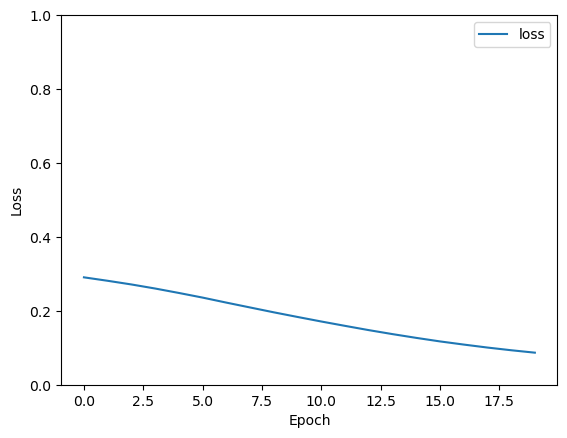

In [12]:
#12.adım görselleştirme
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1.0])
plt.legend(loc='lower right')
plt.close()


plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.0, 1])
plt.legend(loc='upper right');
plt.show()
plt.close()

In [13]:
#13.adım modelin train ve test doğruluklarını çıkarın
test_score, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

3/3 [==============================] - 0s 3ms/step - loss: 0.2203 - accuracy: 0.5556
Test accuracy: 0.5555555820465088


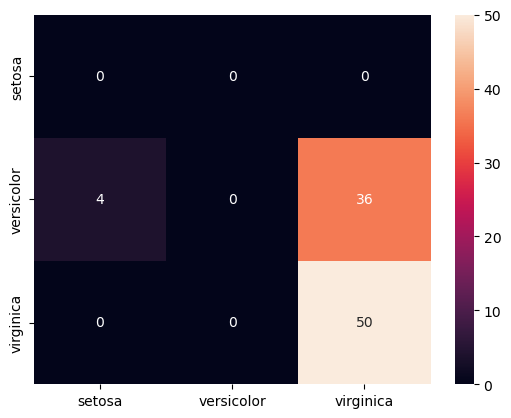

In [14]:
#14.adım multiclass classification için confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test, y_pred)


cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

sns.heatmap(cm_df, annot=True,fmt="g");

plt.show()

In [ ]:
# Kullanıcıdan girdi alıp tahmin yapma işlevi
def predict_species(features):
    features = np.array(features).reshape(1, -1)
    prediction = model.predict(features)
    predicted_class = np.argmax(prediction)
    species_mapping = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
    predicted_species = species_mapping[predicted_class]
    return predicted_species

# Kullanıcıdan özellik girdisi al
user_input = []
for col in x.columns:
    value = float(input(f"Enter {col}: "))
    user_input.append(value)

# Tahmin yap
predicted_species = predict_species(user_input)
print(f"Predicted species: {predicted_species}")